# EDA: Bank Guarantee Analytical Datamart

This notebook analyzes the analytical datamart created by the pipeline and produces figures suitable for inclusion in the paper. 

In [7]:
2

2

In [8]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


def set_plot_style() -> None:
    try:
        plt.style.use("seaborn-v0_8-whitegrid")
    except Exception:
        plt.style.use("ggplot")
    plt.rcParams.update(
        {
            "figure.figsize": (8, 4.5),
            "axes.titlesize": 12,
            "axes.labelsize": 11,
            "xtick.labelsize": 10,
            "ytick.labelsize": 10,
            "legend.fontsize": 10,
        }
    )


set_plot_style()

DATA_PATH = Path(
    "/Users/home/Work/10-edu/data-science/thesis/code/masters-thesis-dev/data/processed/final/wide_analytical_latest.csv"
)
if not DATA_PATH.exists():
    DATA_PATH = (
        Path.cwd()
        / "data"
        / "processed"
        / "final"
        / "wide_analytical_latest.csv"
    )

if not DATA_PATH.exists():
    raise FileNotFoundError(f"Datamart not found: {DATA_PATH}")

wide = pd.read_csv(DATA_PATH, dtype={
        "pcpl_inn": str, "bene_inn": str, "bank_inn": str,
        })
wide['run_id'] = wide['run_id'].fillna(0).astype(int)
print("Loaded:", DATA_PATH)
print("Rows:", len(wide), "Columns:", wide.shape[1])
display(wide.head())

Loaded: /Users/home/Work/10-edu/data-science/thesis/code/masters-thesis-dev/data/processed/final/wide_analytical_latest.csv
Rows: 346778 Columns: 31


,id,run_id,bank_inn,bank_name,pcpl_inn,pcpl_name,pcpl_region,pcpl_city,pcpl_type,bene_inn,...,coverage_type,guarantee_number,published_time,redaction_type,stored_filename,stored_path,sha256,currency_symbol,currency_from_value,sum
0,6,28,4101011782,"ЗАО ""Солид Банк""",7722734998,"Закрытое акционерное общество ""МГЦ-Групп""",NaN,NaN,Юридическое лицо РФ,3728023270,...,Обеспечение исполнения контракта,02B01333000019140001,2014-02-10 00:51:00+04:00,Действующая,6_1.pdf,/Users/home/Work/10-edu/data-science/thesis/co...,cd4bf58cd05425bcd001649d558aee7c80ef6a68e29fad...,₽,643.0,3290613.5
1,11,0,7744002839,"""Миллениум Банк"" (ЗАО)",7724762197,"ООО ""Контрактные Системы""",NaN,NaN,Юридическое лицо РФ,7707329152,...,Обеспечение исполнения контракта,09301731000078140001,NaN,NaN,11_1.pdf,/Users/home/Work/10-edu/data-science/thesis/co...,9d30b73d42dc549658fda852b7db28c19d0cef44319460...,₽,643.0,9000000.0
2,16,23,7744002839,"""Миллениум Банк"" (ЗАО)",7703710832,"Общество с ограниченной ответственностью ""Наска""",NaN,NaN,Юридическое лицо РФ,7709249897,...,Обеспечение исполнения контракта,09303731000424140002,2014-02-12 12:33:00+04:00,Действующая,16_1.jpg,/Users/home/Work/10-edu/data-science/thesis/co...,4c25afe1e0b0010594be154ff6c9618850e9b9e5baa059...,₽,643.0,19200000.0
3,17,23,7744002839,"""Миллениум Банк"" (ЗАО)",7703710832,"Общество с ограниченной ответственностью ""Наска""",NaN,NaN,Юридическое лицо РФ,7709249897,...,Обеспечение исполнения контракта,09303731000424140003,2014-02-12 13:26:00+04:00,Действующая,17_1.jpg,/Users/home/Work/10-edu/data-science/thesis/co...,9a73286341a1d25b3b0f90c37d9e8d39d117029ff69391...,₽,643.0,18000000.0
4,22,23,4101011782,"ЗАО ""Солид Банк""",6154108140,Общество с ограниченной ответственностью “Рубеж”,NaN,NaN,Юридическое лицо РФ,6128004313,...,Обеспечение исполнения контракта,02B03581000113140001,2014-02-18 14:30:00+04:00,Действующая,22_1.pdf,/Users/home/Work/10-edu/data-science/thesis/co...,2844cc715bbbeadcc93baa88a15ed31bc8298e95b47955...,₽,643.0,420000.0


## Dataset Overview

**Caption:** High-level dataset statistics (rows, missingness, file coverage, and total size).

In [9]:
def exists_and_size(path_value: object) -> tuple[bool, float]:
    try:
        if isinstance(path_value, str) and path_value:
            p = Path(path_value)
            if p.exists():
                return True, float(p.stat().st_size)
    except Exception:
        pass
    return False, float("nan")


file_stats = wide["stored_path"].apply(exists_and_size)
file_exists = file_stats.apply(lambda t: t[0])
file_size_bytes = file_stats.apply(lambda t: t[1])

missing_rate_pct = wide.isna().mean().mean() * 100

overview = pd.DataFrame(
    {
        "Metric": [
            "Rows (files)",
            "Unique guarantees",
            "Columns",
            "Mean missing rate (%)",
            "Files present (%)",
            "Total file size (GB)",
            "Mean file size (MB)",
            "Median file size (MB)",
        ],
        "Value": [
            len(wide),
            wide["id"].nunique() if "id" in wide.columns else np.nan,
            wide.shape[1],
            round(missing_rate_pct, 2),
            round(file_exists.mean() * 100, 2),
            round(file_size_bytes.sum() / (1024**3), 2),
            round(file_size_bytes.mean() / (1024**2), 2),
            round(file_size_bytes.median() / (1024**2), 2),
        ],
    }
)

display(overview)

,Metric,Value
0,Rows (files),346778.00
1,Unique guarantees,346778.00
2,Columns,31.00
3,Mean missing rate (%),1.08
4,Files present (%),100.00
5,Total file size (GB),383.18
6,Mean file size (MB),1.13
7,Median file size (MB),0.90


In [11]:
print(overview.to_latex())

\begin{tabular}{llr}
\toprule
 & Metric & Value \\
\midrule
0 & Rows (files) & 346778.000000 \\
1 & Unique guarantees & 346778.000000 \\
2 & Columns & 31.000000 \\
3 & Mean missing rate (%) & 1.080000 \\
4 & Files present (%) & 100.000000 \\
5 & Total file size (GB) & 383.180000 \\
6 & Mean file size (MB) & 1.130000 \\
7 & Median file size (MB) & 0.900000 \\
\bottomrule
\end{tabular}



In [26]:
pd.set_option('display.max_columns', 500)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
# Basic type normalization and derived fields

wide = wide.copy()

# Dates and timestamps
for col in ["issue_date", "start_date", "end_date"]:
    if col in wide.columns:
        wide[col] = pd.to_datetime(wide[col], errors="coerce")

# # Numeric amounts
# if "sum" in wide.columns:
#     wide["sum"] = pd.to_numeric(wide["sum"], errors="coerce")

# Duration between dates (days)
if "start_date" in wide.columns and "end_date" in wide.columns:
    wide["duration_days"] = (wide["end_date"] - wide["start_date"]).dt.days

    duration = wide["duration_days"].dropna()
    if not duration.empty:
        lower = 0
        upper = 10_000
        mask = wide["duration_days"].isna() | wide["duration_days"].between(lower, upper)
        before = len(wide)
        wide = wide[mask].copy()
        after = len(wide)
        print(
            "Duration outlier filter:",
            f"lower={lower:.2f}",
            f"upper={upper:.2f}",
            f"removed={before - after}",
        )

    duration = wide["duration_days"].dropna()
    if not duration.empty:
        q1 = duration.quantile(0.25)
        q3 = duration.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        mask = wide["duration_days"].isna() | wide["duration_days"].between(lower, upper)
        before = len(wide)
        wide = wide[mask].copy()
        after = len(wide)
        print(
            "Duration outlier filter (IQR):",
            f"lower={lower:.2f}",
            f"upper={upper:.2f}",
            f"removed={before - after}",
        )

# Year buckets
for col in ["issue_date", "start_date", "end_date"]:
    if col in wide.columns:
        wide[f"{col}_year"] = wide[col].dt.year

# File existence and size

def path_exists(p: object) -> bool:
    return isinstance(p, str) and p and Path(p).exists()


def safe_size(p: object) -> float:
    try:
        if isinstance(p, str) and p:
            return Path(p).stat().st_size
    except Exception:
        return np.nan
    return np.nan

wide["file_exists"] = wide["stored_path"].apply(path_exists)
wide["file_size_bytes"] = wide["stored_path"].apply(safe_size)
wide["file_size_mb"] = wide["file_size_bytes"] / (1024**2)

# File extension
wide["file_ext"] = (
    wide["stored_filename"]
    .astype(str)
    .str.extract(r"\.([A-Za-z0-9]+)$", expand=False)
    .str.lower()
)

Duration outlier filter: lower=0.00 upper=10000.00 removed=215
Duration outlier filter (IQR): lower=22.50 upper=538.50 removed=14944


**Outlier handling (duration_days):** We remove rows outside the classical 1.5×IQR range computed from non‑missing durations. This rule is simple, interpretable, and robust for skewed distributions, while preserving the bulk of typical durations. Missing durations are kept.

In [14]:
wide['currency'] = None 
wide.loc[wide['currency_from_value'] == 643, 'currency'] = 'RUB'

In [15]:
# Dataset overview

summary = pd.DataFrame(
    {
        "non_null": wide.count(),
        "missing": wide.isna().sum(),
        "missing_pct": (wide.isna().mean() * 100).round(2),
        "n_unique": wide.nunique(dropna=True),
    }
).sort_values("missing_pct", ascending=False)

print("Unique guarantees:", wide["id"].nunique())
print("Run IDs:", sorted(wide["run_id"].dropna().unique().tolist()) if "run_id" in wide.columns else "n/a")

summary.head(15)

Unique guarantees: 331619
Run IDs: [0, 2, 14, 15, 16, 17, 18, 23, 24, 26, 28, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53]


,non_null,missing,missing_pct,n_unique
pcpl_name,297030,34589,10.43,45335
pcpl_city,310555,21064,6.35,5411
duration_days,319051,12568,3.79,516
start_date_year,319051,12568,3.79,8
start_date,319051,12568,3.79,509
pcpl_region,321322,10297,3.11,86
bene_city,323260,8359,2.52,10029
bene_region,323331,8288,2.50,86
issue_date,325477,6142,1.85,454
file_ext,325484,6135,1.85,13


In [16]:
print(summary.head(15).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & non_null & missing & missing_pct & n_unique \\
\midrule
pcpl_name & 297030 & 34589 & 10.430000 & 45335 \\
pcpl_city & 310555 & 21064 & 6.350000 & 5411 \\
duration_days & 319051 & 12568 & 3.790000 & 516 \\
start_date_year & 319051 & 12568 & 3.790000 & 8 \\
start_date & 319051 & 12568 & 3.790000 & 509 \\
pcpl_region & 321322 & 10297 & 3.110000 & 86 \\
bene_city & 323260 & 8359 & 2.520000 & 10029 \\
bene_region & 323331 & 8288 & 2.500000 & 86 \\
issue_date & 325477 & 6142 & 1.850000 & 454 \\
file_ext & 325484 & 6135 & 1.850000 & 13 \\
currency_symbol & 325476 & 6143 & 1.850000 & 2 \\
sum_summary & 325477 & 6142 & 1.850000 & 255574 \\
issue_date_year & 325477 & 6142 & 1.850000 & 9 \\
published_time & 331594 & 25 & 0.010000 & 96938 \\
redaction_type & 331594 & 25 & 0.010000 & 2 \\
\bottomrule
\end{tabular}



## Missingness Overview

**Caption:** Top 20 fields by percentage of missing values in the analytical datamart.

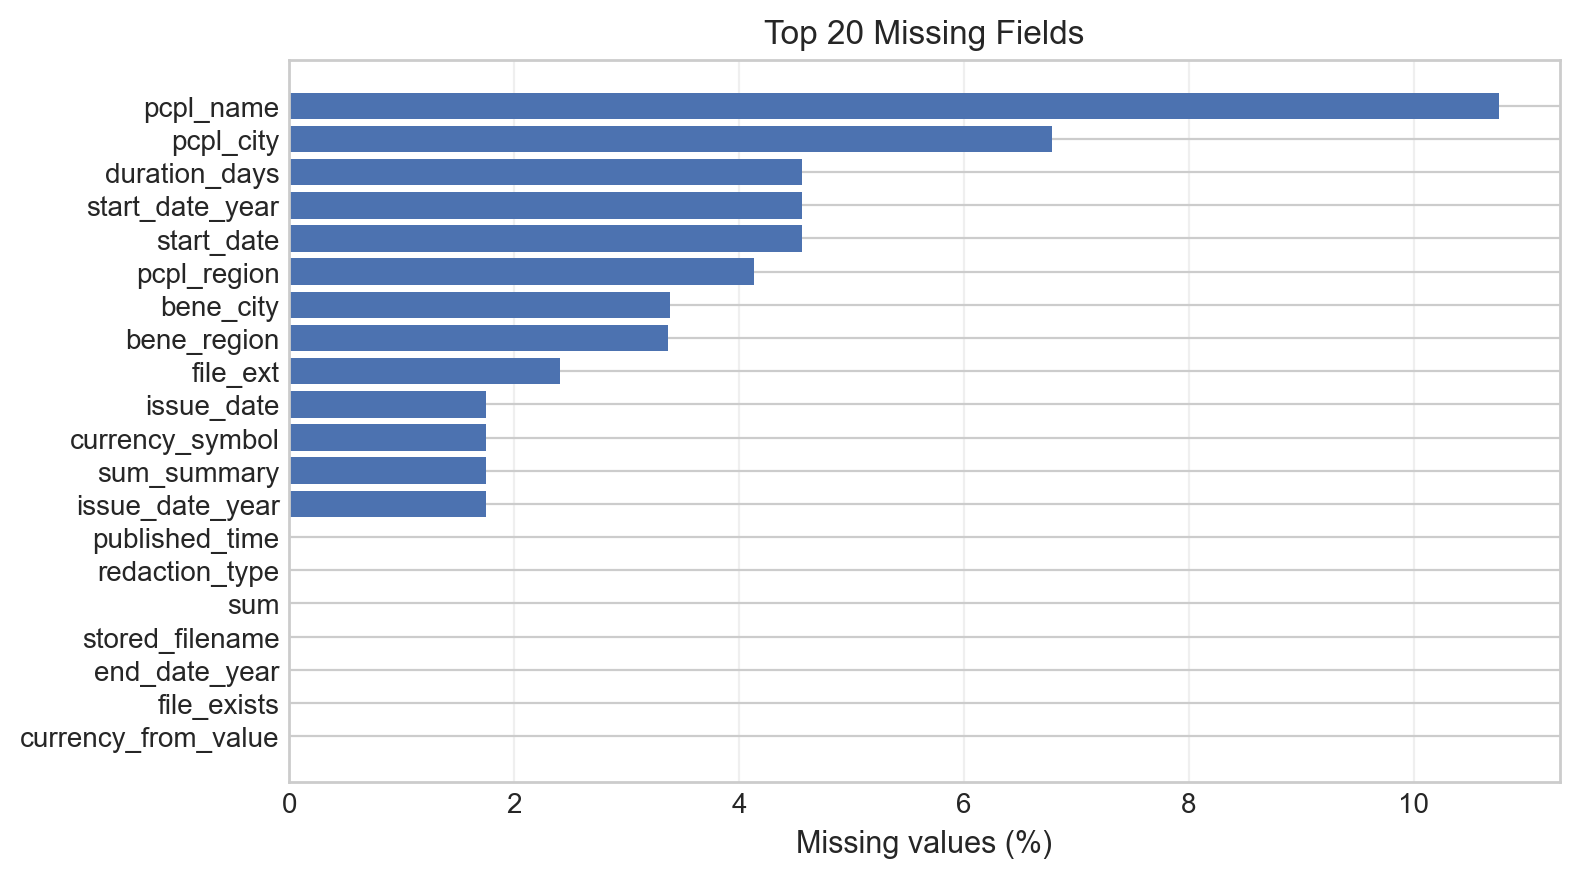

In [58]:
missing_top = summary.head(20).sort_values("missing_pct", ascending=True)

fig, ax = plt.subplots()
ax.barh(missing_top.index, missing_top["missing_pct"], color="#4C72B0")
ax.set_xlabel("Missing values (%)")
ax.set_title("Top 20 Missing Fields")
ax.grid(axis="x", alpha=0.3)
plt.tight_layout()

In [59]:
wide[wide['file_ext'].isna()][['bank_inn','bank_name']].drop_duplicates()

,bank_inn,bank_name
13250,7736046991,"АКБ ""АБСОЛЮТ БАНК"" (ПАО)"


## Monetary Amounts and Durations

**Caption:** Distributions of guarantee amounts (linear and log scale) and durations in days.

In [61]:
plt.rcParams['savefig.format'] = 'pdf'

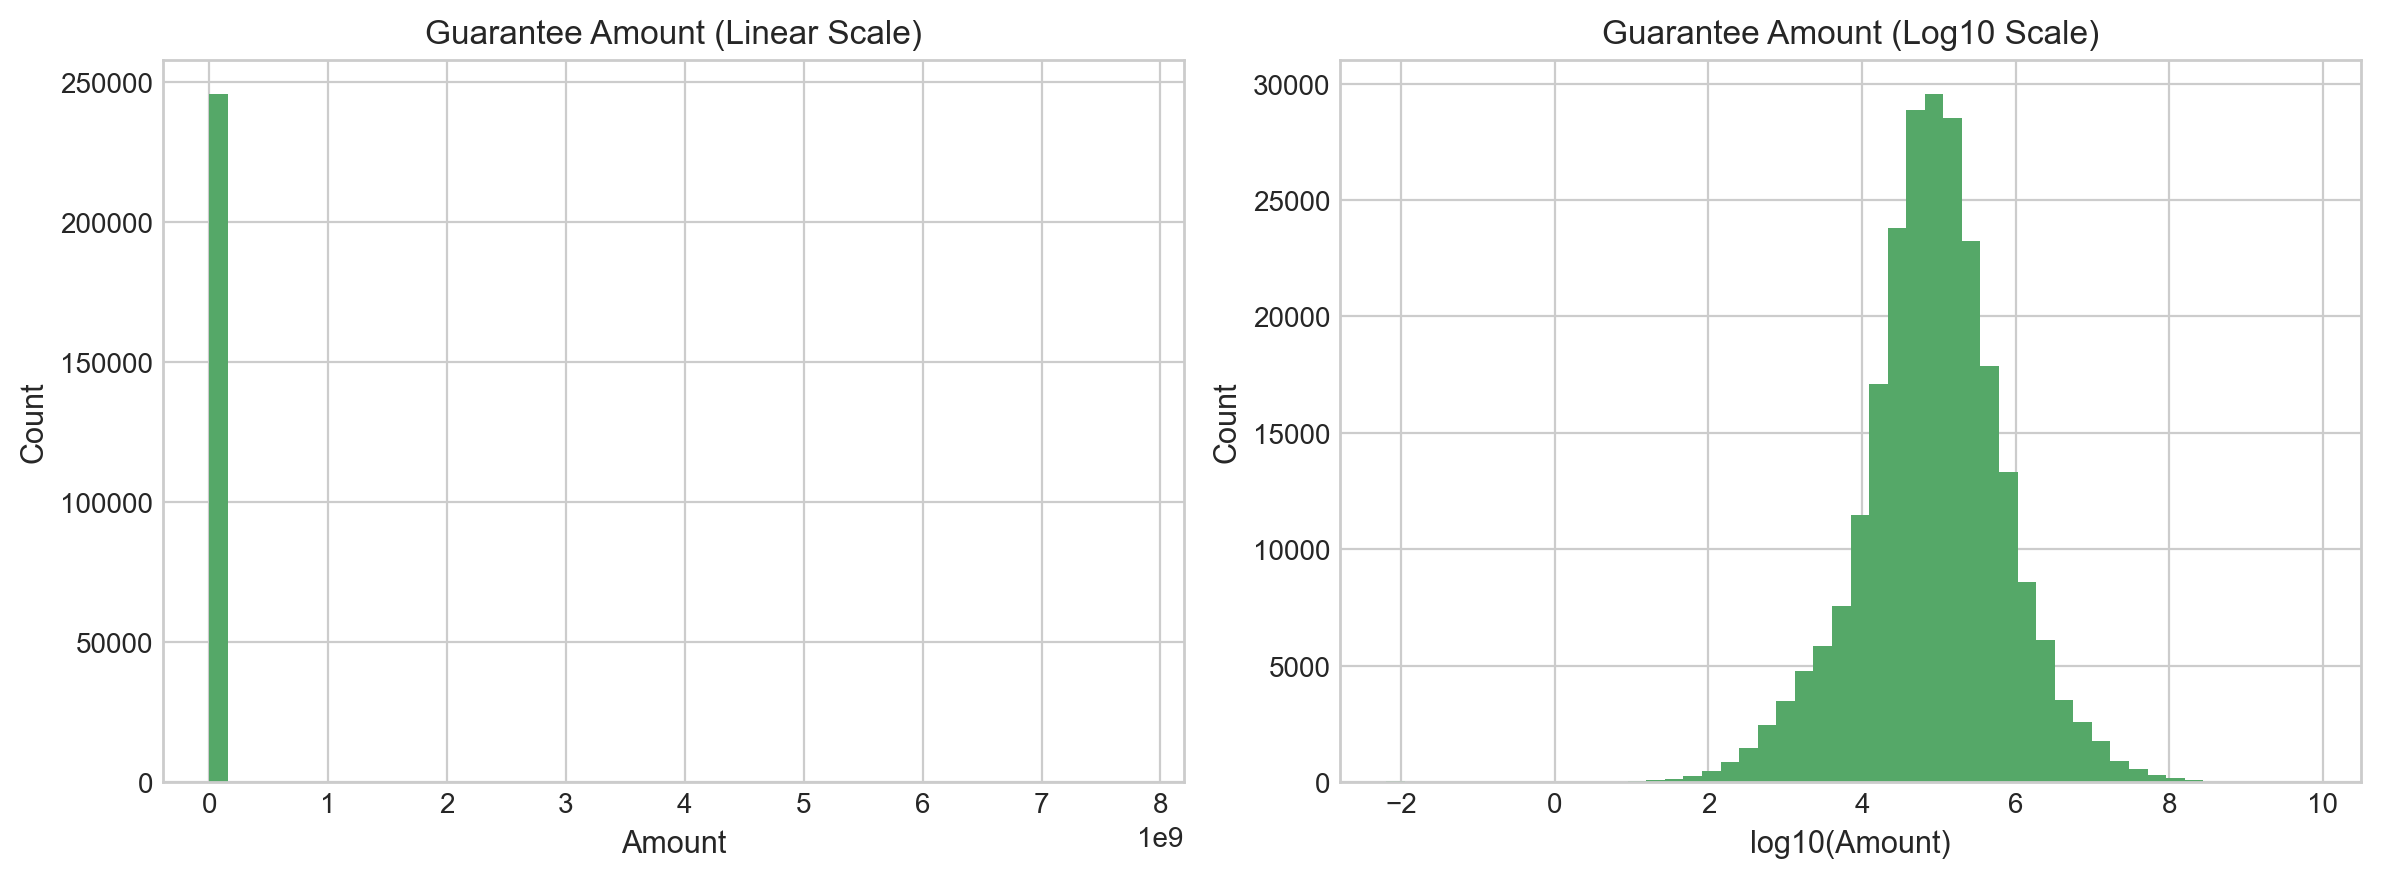

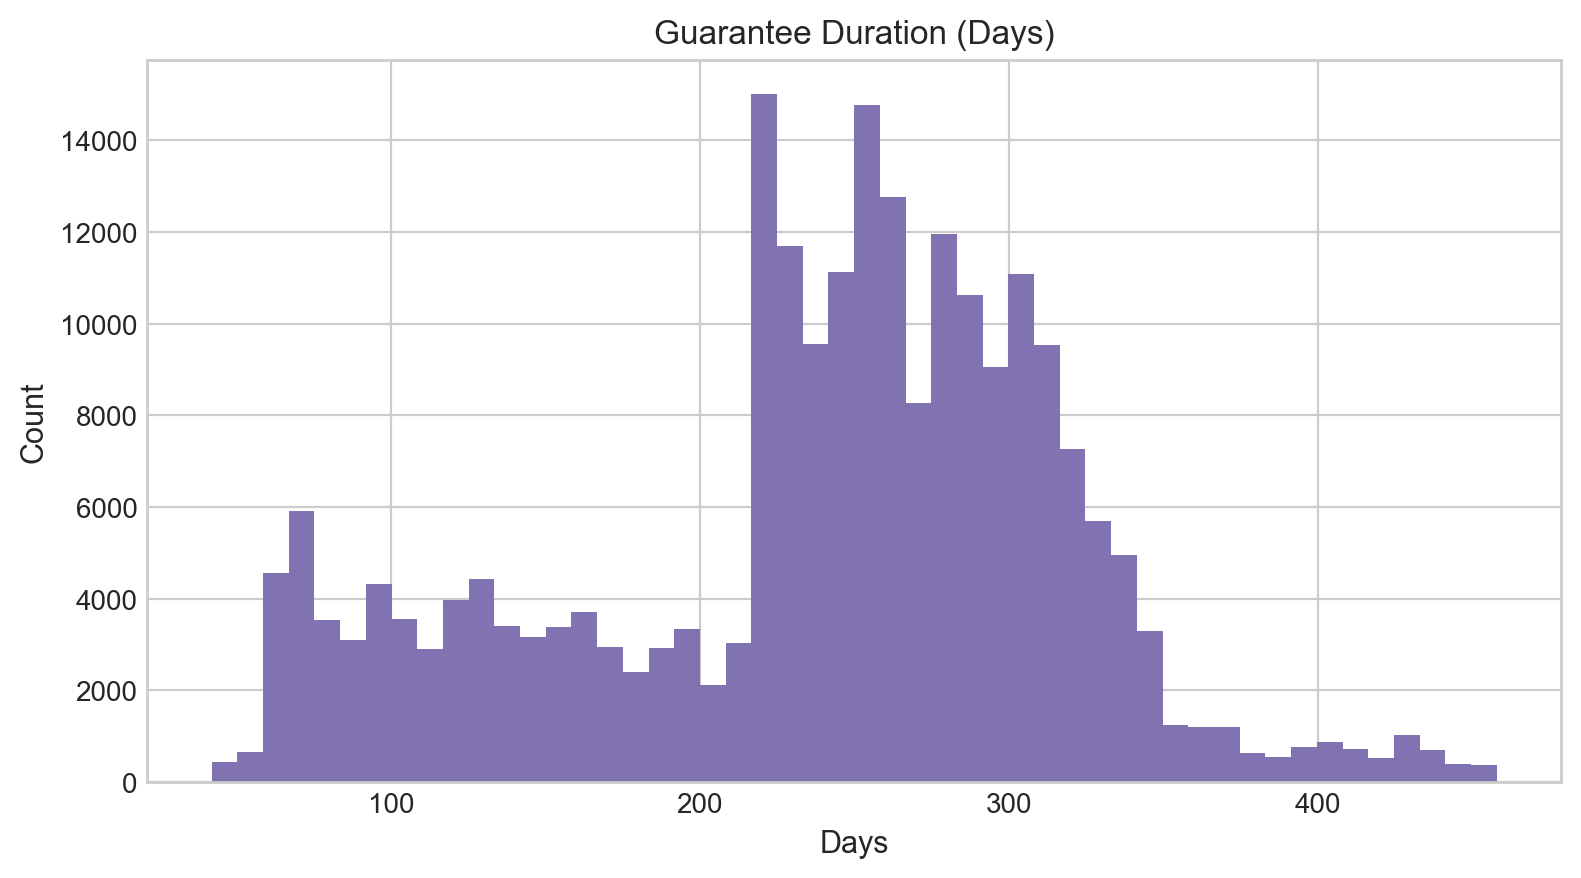

In [60]:
amounts = wide["sum"].dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))
axes[0].hist(amounts, bins=50, color="#55A868")
axes[0].set_title("Guarantee Amount (Linear Scale)")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Count")

axes[1].hist(np.log10(amounts[amounts > 0]), bins=50, color="#55A868")
axes[1].set_title("Guarantee Amount (Log10 Scale)")
axes[1].set_xlabel("log10(Amount)")
axes[1].set_ylabel("Count")

plt.tight_layout()

# Duration distribution
if "duration_days" in wide.columns:
    fig, ax = plt.subplots()
    ax.hist(wide["duration_days"].dropna(), bins=50, color="#8172B2")
    ax.set_title("Guarantee Duration (Days)")
    ax.set_xlabel("Days")
    ax.set_ylabel("Count")
    plt.tight_layout()

## Temporal Distributions

**Caption:** Yearly counts for issue date, start date, and end date.

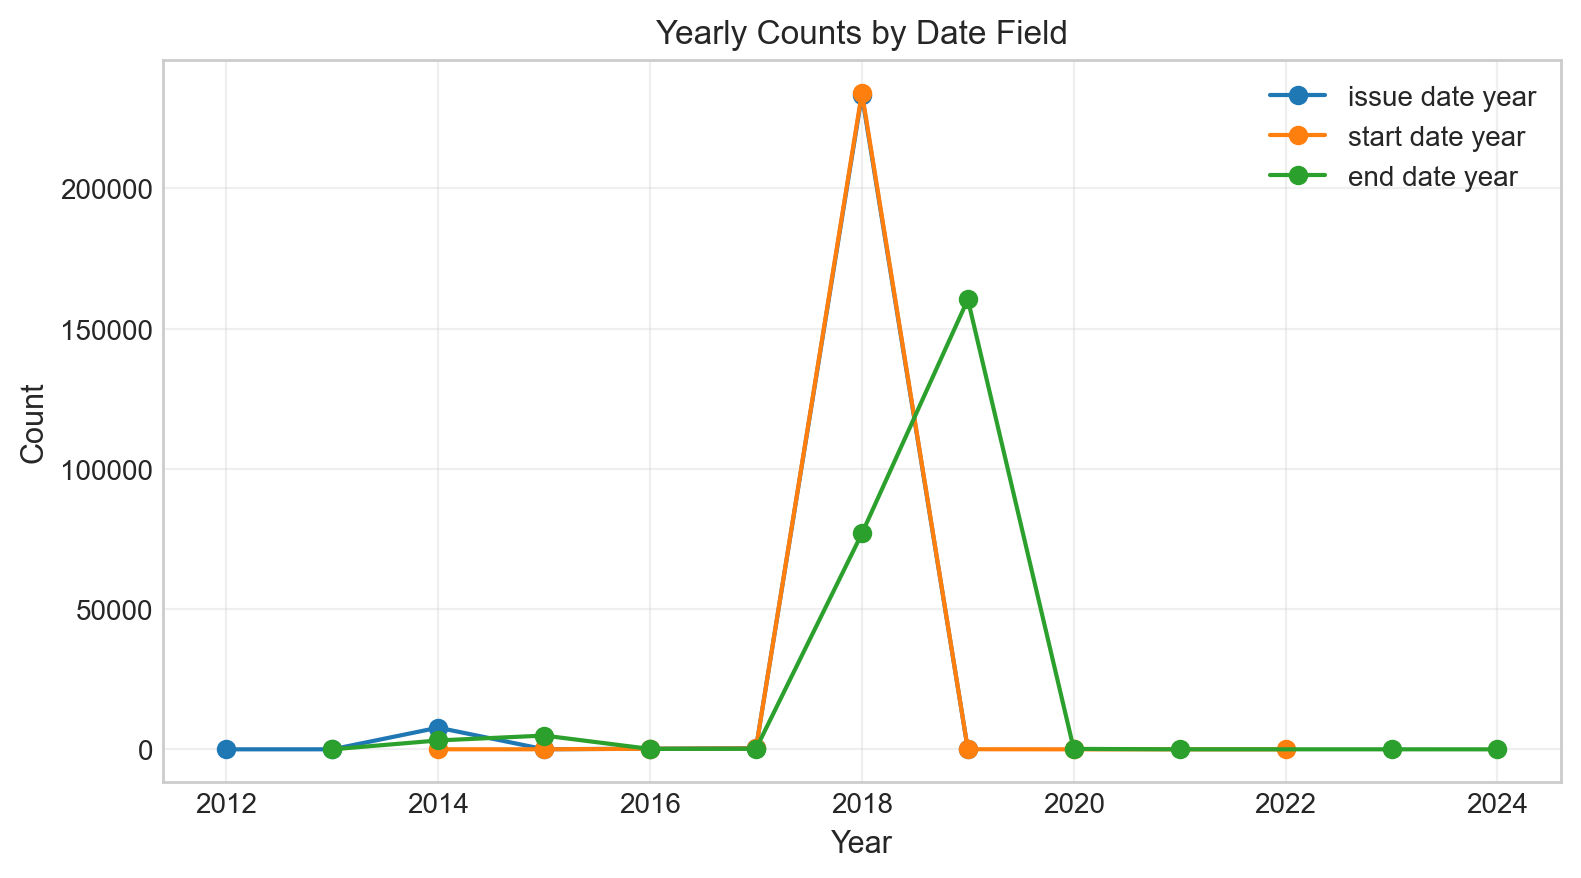

In [63]:
fig, ax = plt.subplots()
for col, color in [
    ("issue_date_year", "#4C72B0"),
    ("start_date_year", "#55A868"),
    ("end_date_year", "#C44E52"),
]:
    if col in wide.columns:
        counts = wide[col].dropna().astype(int).value_counts().sort_index()
        ax.plot(counts.index, counts.values, marker="o", label=col.replace("_", " "))

ax.set_title("Yearly Counts by Date Field")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()

## Categorical Distributions

**Caption:** Top categories for key textual fields (bank, beneficiary type, coverage type, and currency label).

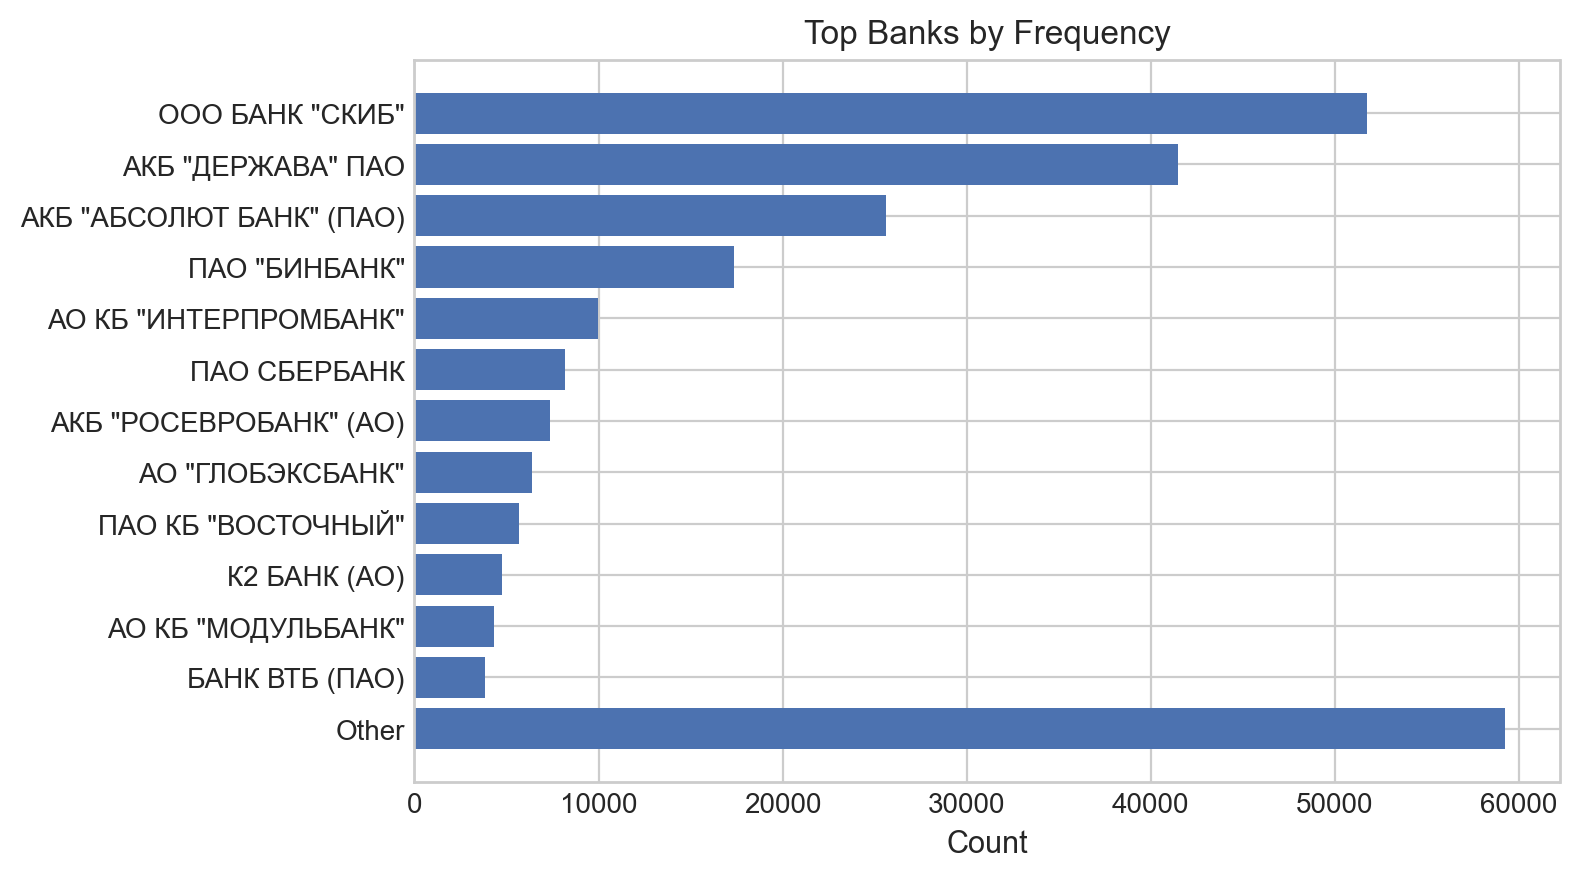

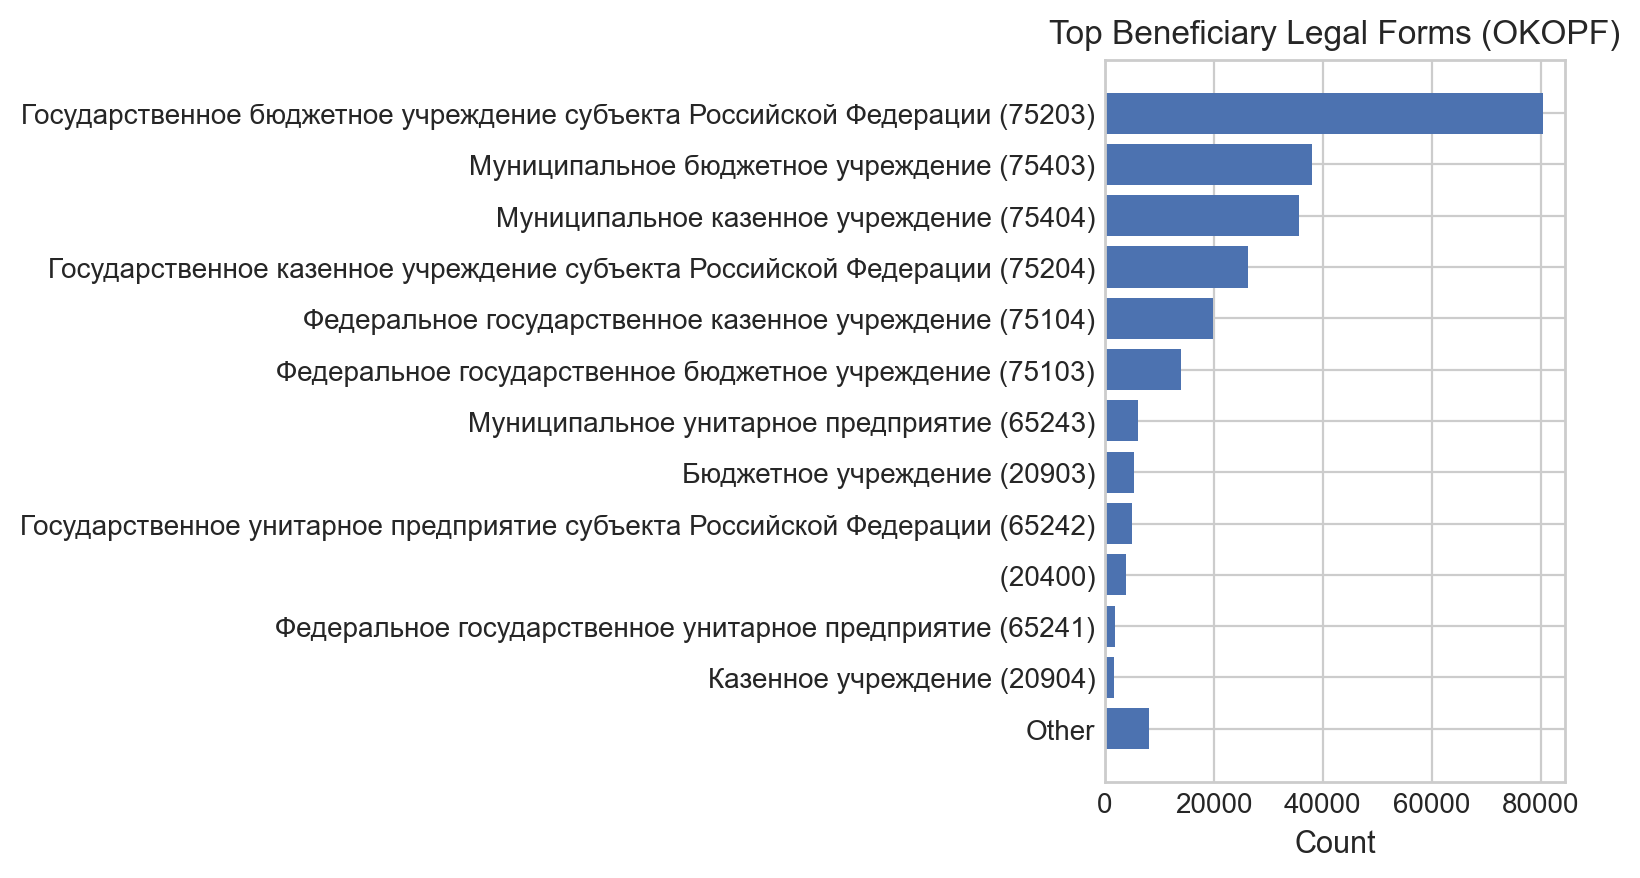

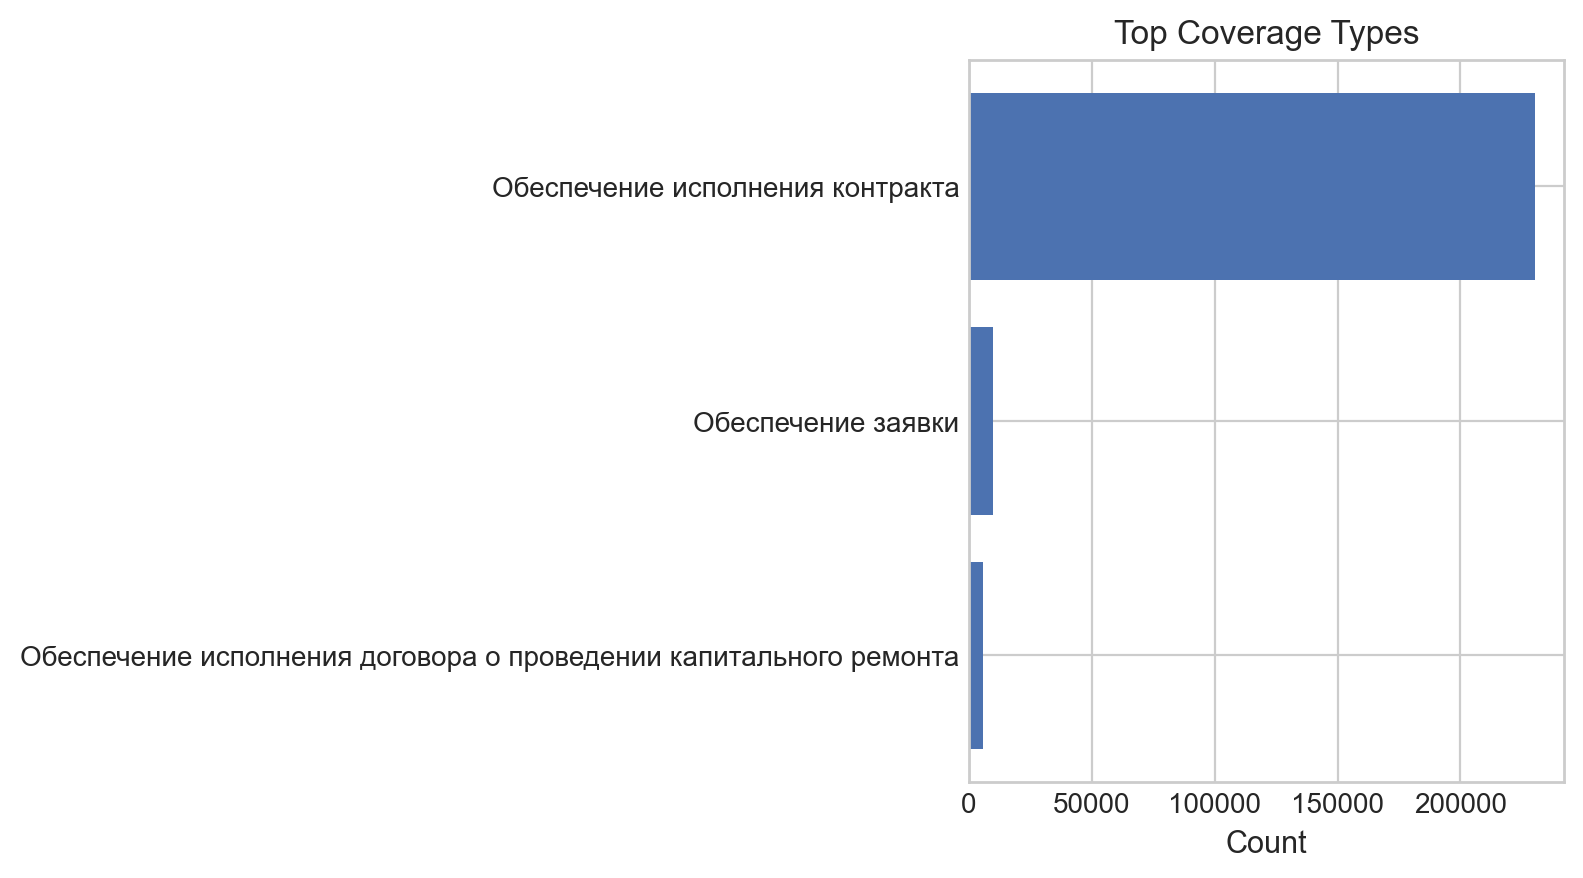

In [64]:
def plot_top_categories(series: pd.Series, title: str, top_n: int = 10) -> None:
    counts = series.dropna().astype(str).value_counts()
    if counts.empty:
        return

    top = counts.head(top_n)
    other_count = counts.iloc[top_n:].sum()
    if other_count > 0:
        top = pd.concat([top, pd.Series({"Other": other_count})])

    order = top.index.tolist()
    if "Other" in order:
        order = [label for label in order if label != "Other"] + ["Other"]
    top = top.loc[order]

    fig, ax = plt.subplots()
    ax.barh(top.index, top.values, color="#4C72B0")
    ax.set_title(title)
    ax.set_xlabel("Count")
    ax.invert_yaxis()
    plt.tight_layout()


plot_top_categories(wide.get("bank_name"), "Top Banks by Frequency", top_n=12)
plot_top_categories(wide.get("bene_type"), "Top Beneficiary Legal Forms (OKOPF)", top_n=12)
plot_top_categories(wide.get("coverage_type"), "Top Coverage Types", top_n=12)
# plot_top_categories(wide.get("currency_from_label"), "Currency Labels (Field Names)", top_n=8)

## File Analysis

**Caption:** File availability, sizes, extensions, and (when available) PDF page counts.

In [17]:
if "page_count" in wide.columns:
    wide = wide.drop(columns=['page_count'])

file_exists
True    331619
Name: count, dtype: int64

Multiple definitions in dictionary at byte 0x1090d4 for key /Info
Multiple definitions in dictionary at byte 0x1090e1 for key /Info
Multiple definitions in dictionary at byte 0x1090ee for key /Info
incorrect startxref pointer(3)
Multiple definitions in dictionary at byte 0xf6c43 for key /Info
Multiple definitions in dictionary at byte 0xf6c50 for key /Info
Multiple definitions in dictionary at byte 0xf6c5d for key /Info
Multiple definitions in dictionary at byte 0x28ec79 for key /Info
Multiple definitions in dictionary at byte 0x28ec86 for key /Info
Multiple definitions in dictionary at byte 0x28ec93 for key /Info
incorrect startxref pointer(3)
Multiple definitions in dictionary at byte 0x3334b6 for key /Info
Multiple definitions in dictionary at byte 0x3334c3 for key /Info
Multiple definitions in dictionary at byte 0x3334d0 for key /Info
startxref on same line as offset
Multiple definitions in dictionary at byte 0x179b00 for key /ID
Multiple definitions in dictionary at byte 0x25c95 f

Page counts computed for a sample of 10000 PDFs.


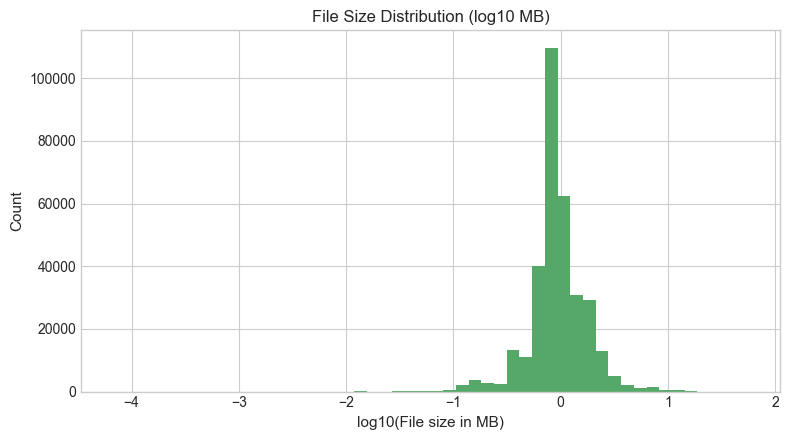

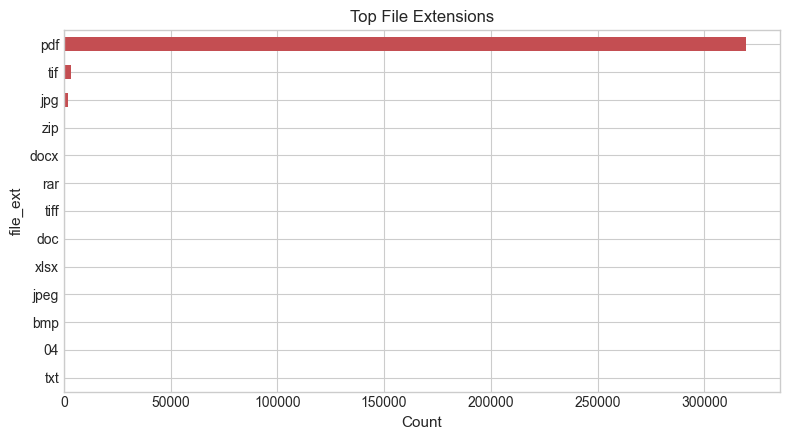

In [18]:
# File availability summary
file_exists_counts = wide["file_exists"].value_counts(dropna=False)
display(file_exists_counts)

# File size distribution (existing files only)
size_existing = wide.loc[wide["file_exists"], "file_size_mb"].dropna()
if not size_existing.empty:
    fig, ax = plt.subplots()
    ax.hist(np.log10(size_existing[size_existing > 0]), bins=50, color="#55A868")
    ax.set_title("File Size Distribution (log10 MB)")
    ax.set_xlabel("log10(File size in MB)")
    ax.set_ylabel("Count")
    plt.tight_layout()

# File extensions
ext_counts = wide["file_ext"].dropna().value_counts().head(15)
if not ext_counts.empty:
    fig, ax = plt.subplots()
    ext_counts.sort_values().plot.barh(ax=ax, color="#C44E52")
    ax.set_title("Top File Extensions")
    ax.set_xlabel("Count")
    plt.tight_layout()

# Page count analysis for PDFs (computed if missing)
if "page_count" not in wide.columns:
    try:
        from pypdf import PdfReader

        def pdf_page_count(path: Path) -> float:
            try:
                return float(len(PdfReader(path).pages))
            except Exception:
                return np.nan

        pdf_mask = wide["file_exists"] & wide["file_ext"].eq("pdf")
        max_pages_to_compute = 10000
        idx = wide[pdf_mask].index
        if len(idx) > max_pages_to_compute:
            idx = np.random.RandomState(42).choice(idx, size=max_pages_to_compute, replace=False)
            note = f"Page counts computed for a sample of {max_pages_to_compute} PDFs."
        else:
            note = f"Page counts computed for {len(idx)} PDFs."
        wide.loc[idx, "page_count"] = wide.loc[idx, "stored_path"].apply(
            lambda p: pdf_page_count(Path(p))
        )
        print(note)
    except Exception as exc:
        print("Page count computation skipped:", exc)

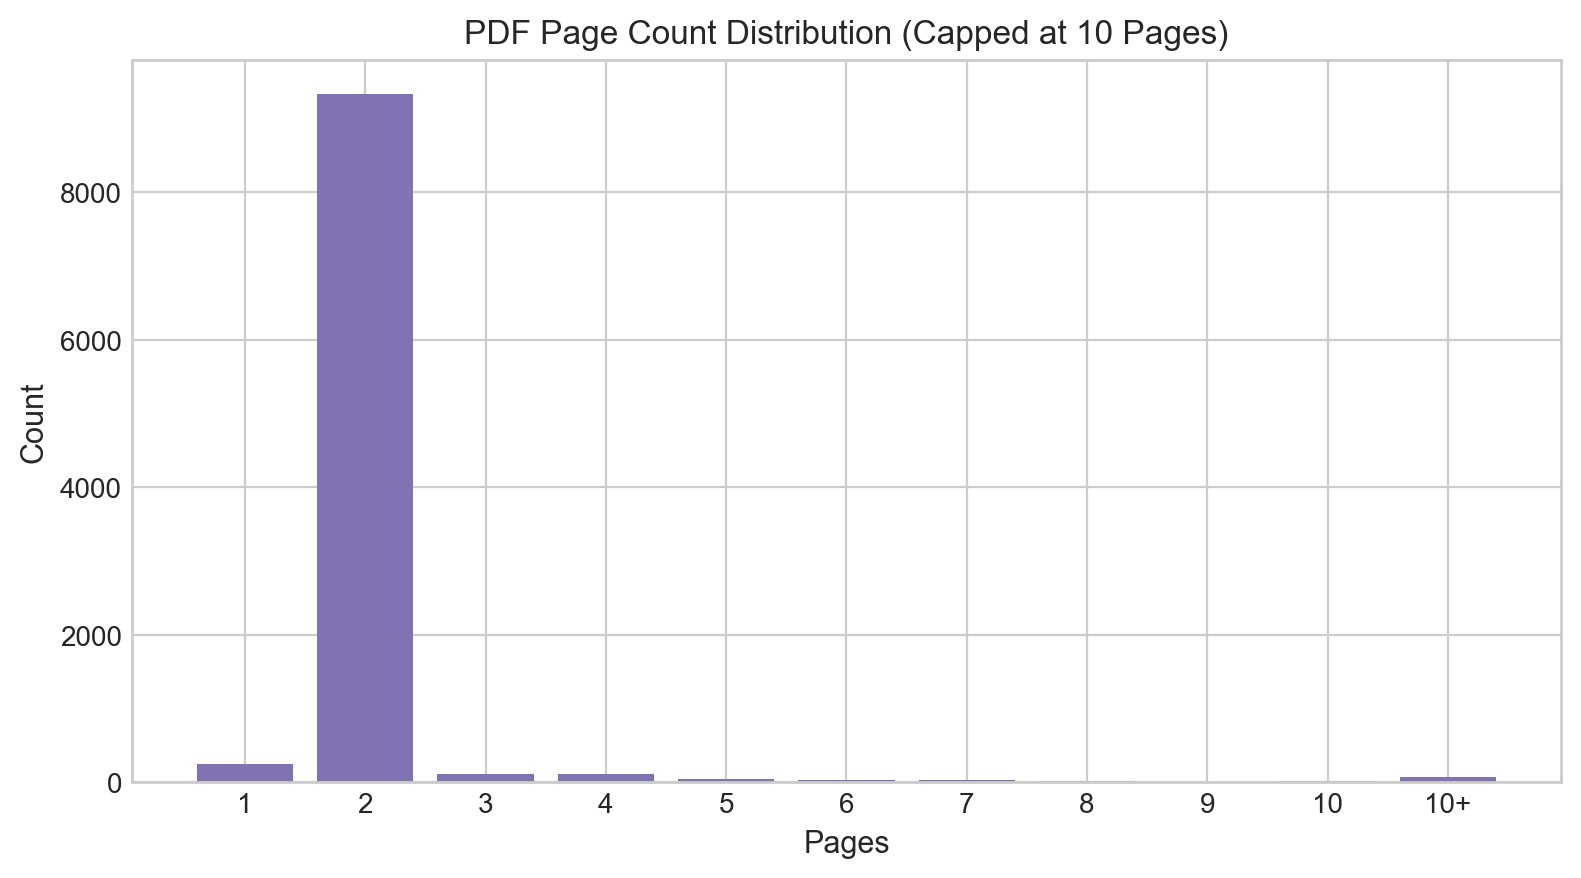

In [67]:
page_counts = wide.get("page_count")
if page_counts is not None:
    pc = pd.to_numeric(page_counts, errors="coerce").dropna()
    if not pc.empty:
        pc_int = pc.round().astype(int)
        pc_bin = pc_int.where(pc_int <= 10, 11)
        counts = pc_bin.value_counts().sort_index()
        counts.index = [str(i) if i <= 10 else "10+" for i in counts.index]
        order = [str(i) for i in range(1, 11)] + ["10+"]
        counts = counts.reindex(order).fillna(0)

        fig, ax = plt.subplots()
        ax.bar(counts.index, counts.values, color="#8172B2")
        ax.set_title("PDF Page Count Distribution (Capped at 10 Pages)")
        ax.set_xlabel("Pages")
        ax.set_ylabel("Count")
        plt.tight_layout()

## Relationships

**Caption:** Relationship between guarantee amounts and file sizes (log scale).

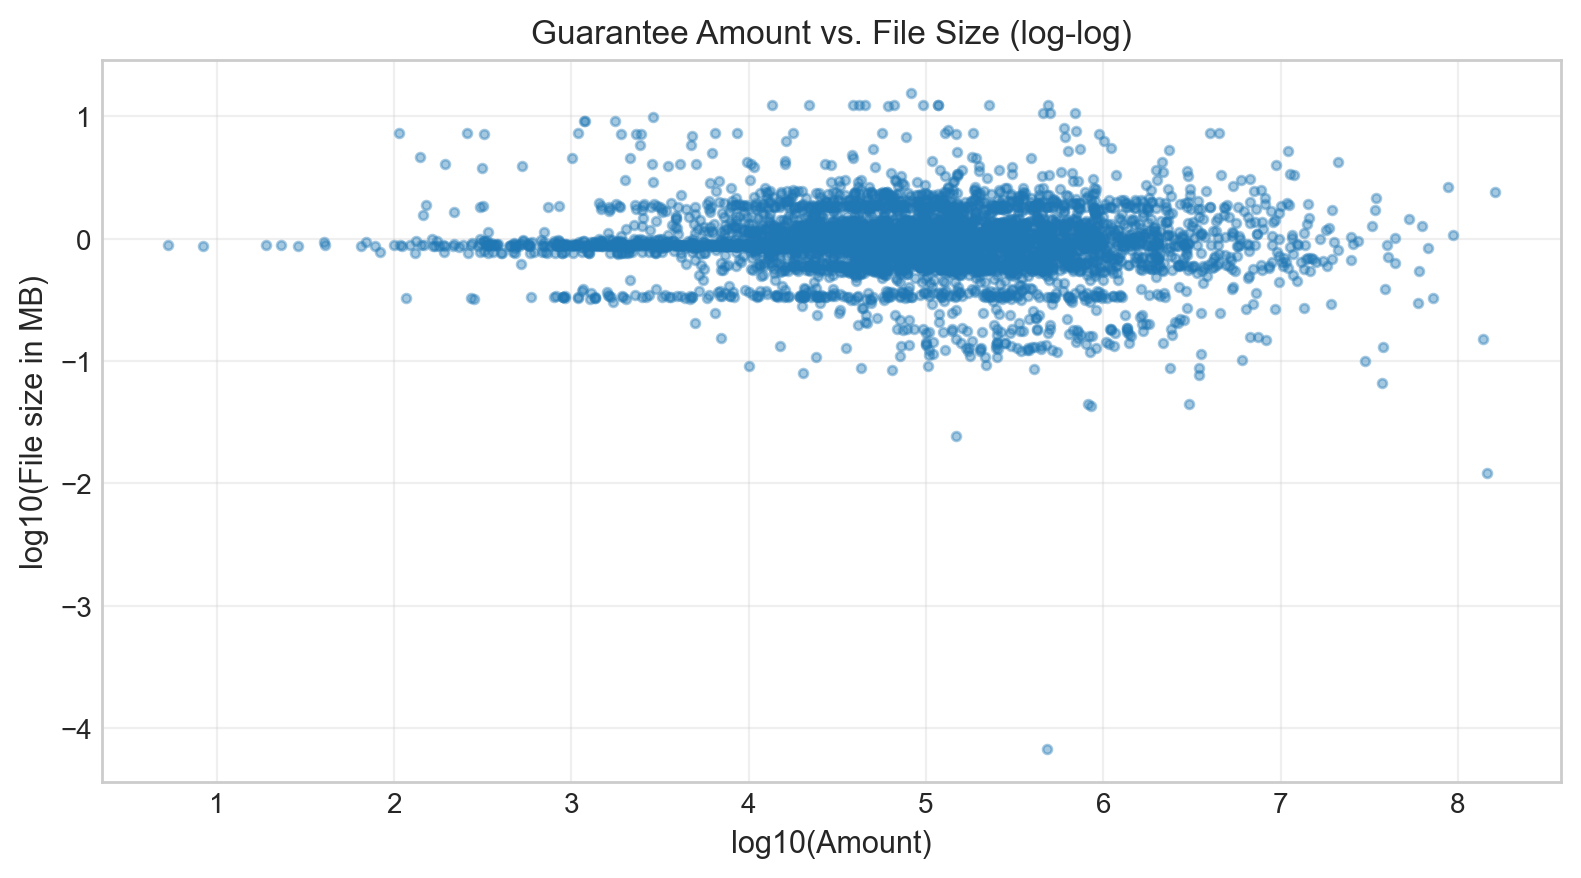

In [68]:
subset = wide[(wide["sum"] > 0) & (wide["file_size_mb"] > 0)]
if not subset.empty:
    if len(subset) > 5000:
        subset = subset.sample(5000, random_state=42)
    fig, ax = plt.subplots()
    ax.scatter(np.log10(subset["sum"]), np.log10(subset["file_size_mb"]), alpha=0.4, s=10)
    ax.set_title("Guarantee Amount vs. File Size (log-log)")
    ax.set_xlabel("log10(Amount)")
    ax.set_ylabel("log10(File size in MB)")
    ax.grid(alpha=0.3)
    plt.tight_layout()

## Key Summary Tables

**Caption:** Descriptive statistics for key numeric fields.

In [19]:
numeric_cols = [
    c
    for c in ["sum", "duration_days", "file_size_mb", "page_count"]
    if c in wide.columns
]
if numeric_cols:
    display(wide[numeric_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
sum,331609.0,1.129347e+06,3.147876e+07,0.000000,22414.500000,80626.500000,289996.070000,7.806197e+09
duration_days,319051.0,2.601850e+02,9.779892e+01,23.000000,210.000000,262.000000,330.000000,5.380000e+02
file_size_mb,331619.0,1.133503e+00,9.476796e-01,0.000067,0.737638,0.896164,1.234093,5.610869e+01
page_count,9999.0,2.257626e+00,2.013317e+00,1.000000,2.000000,2.000000,2.000000,3.400000e+01


In [20]:
print((wide[numeric_cols].describe().T).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
sum & 331609.000000 & 1129347.438841 & 31478763.494467 & 0.000000 & 22414.500000 & 80626.500000 & 289996.070000 & 7806197002.006430 \\
duration_days & 319051.000000 & 260.185021 & 97.798920 & 23.000000 & 210.000000 & 262.000000 & 330.000000 & 538.000000 \\
file_size_mb & 331619.000000 & 1.133503 & 0.947680 & 0.000067 & 0.737638 & 0.896164 & 1.234093 & 56.108688 \\
page_count & 9999.000000 & 2.257626 & 2.013317 & 1.000000 & 2.000000 & 2.000000 & 2.000000 & 34.000000 \\
\bottomrule
\end{tabular}



## Geographic Distribution

**Caption:** Top regions for principals and beneficiaries.

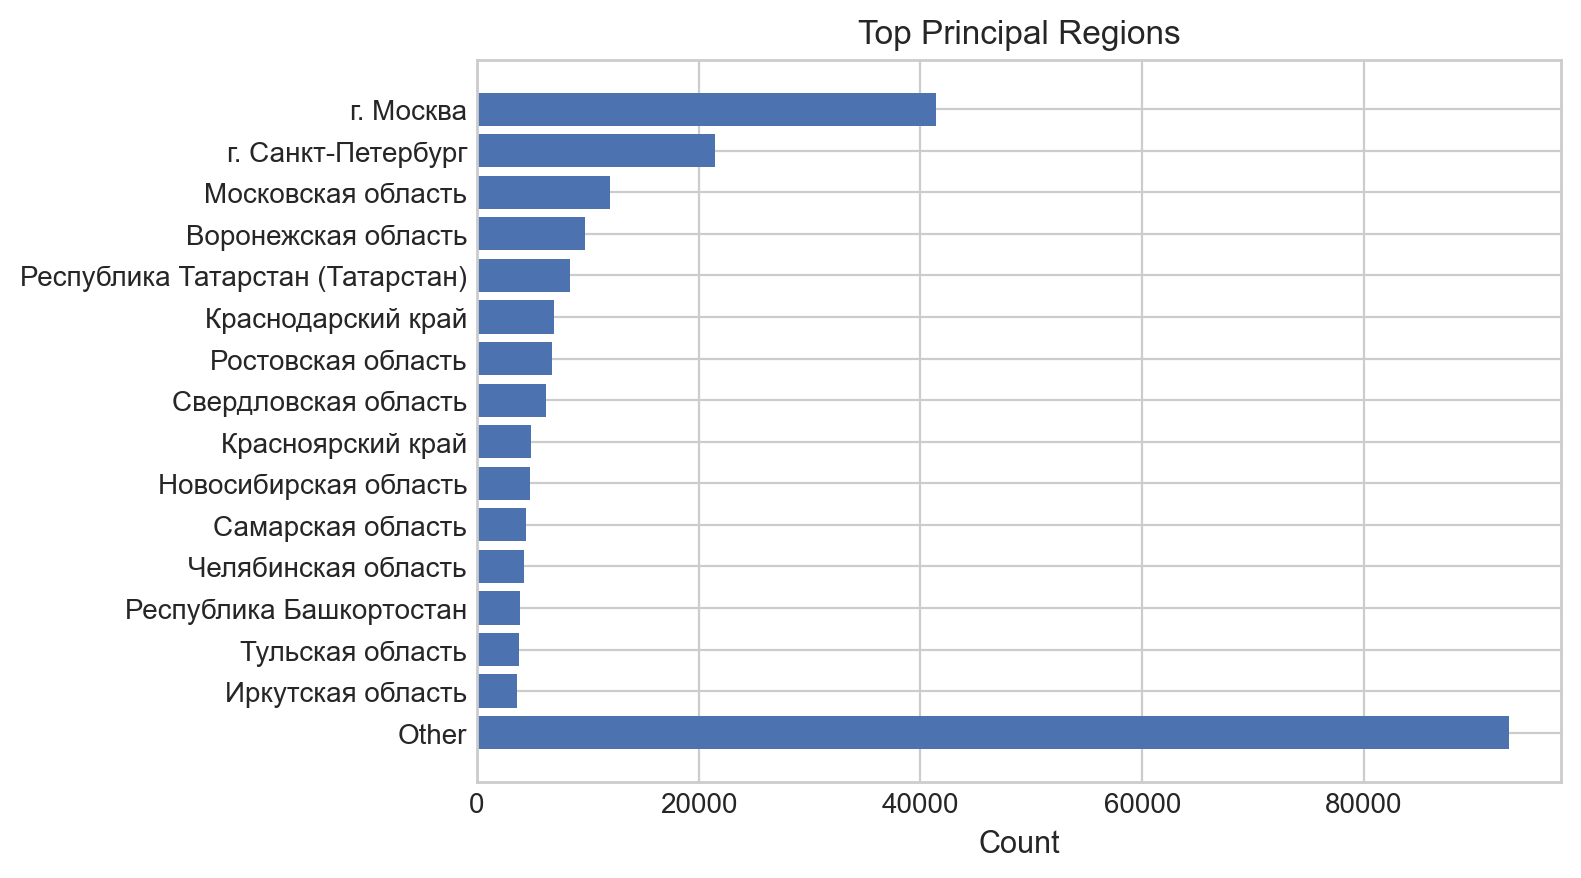

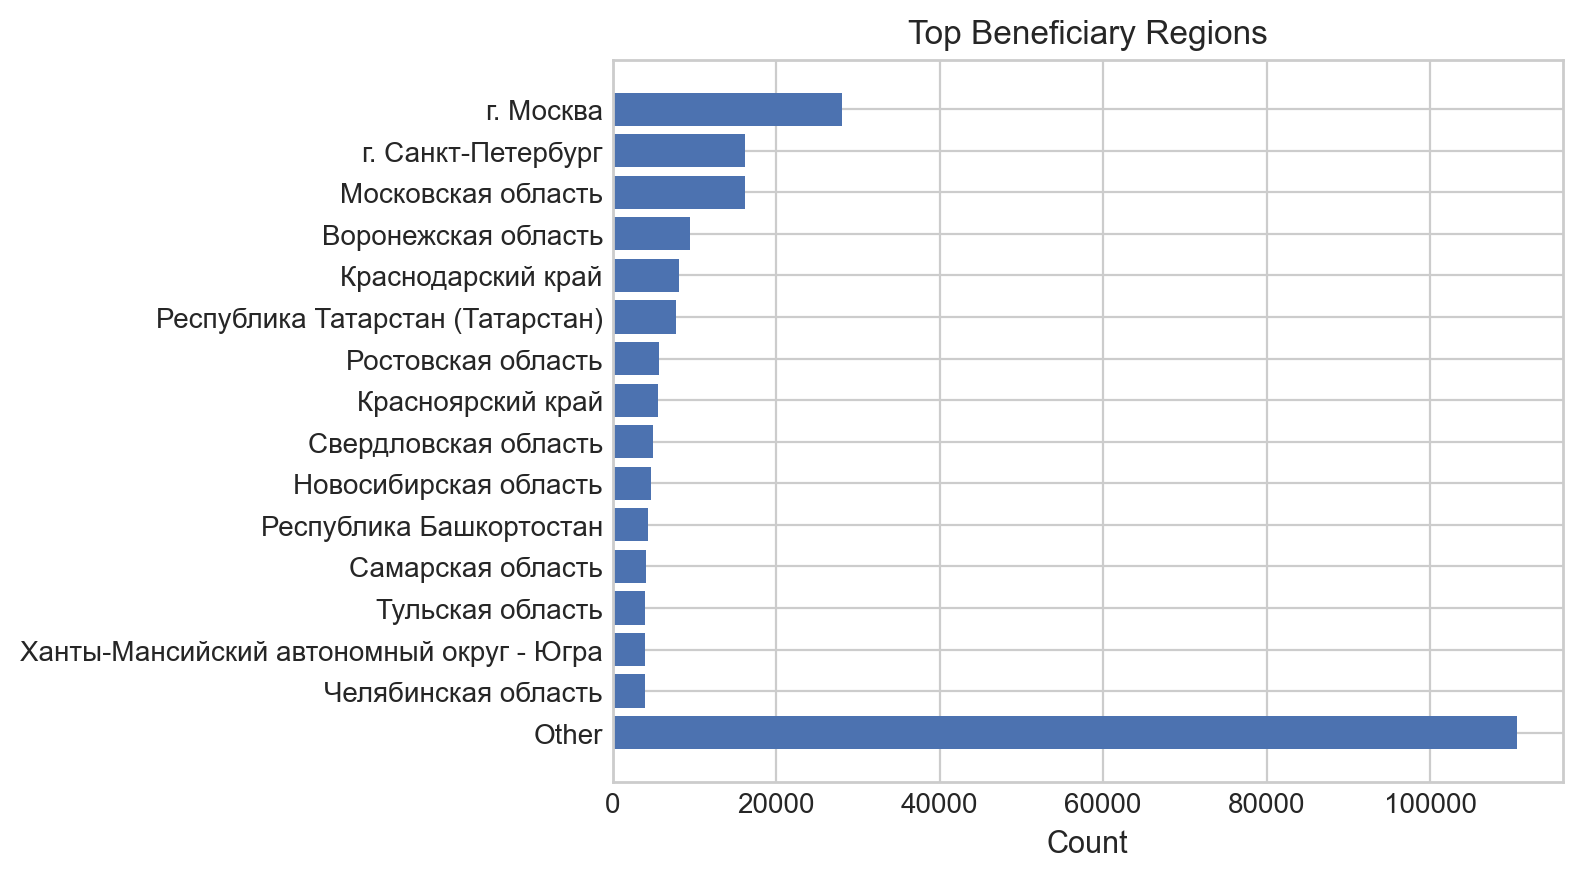

In [71]:
plot_top_categories(wide.get("pcpl_region"), "Top Principal Regions", top_n=15)
plot_top_categories(wide.get("bene_region"), "Top Beneficiary Regions", top_n=15)

## Notes

- **Commentary:** Page counts are computed only for available PDFs; if the corpus is very large, the notebook samples up to 10,000 PDFs to keep runtime reasonable.

## Create final dataset

In [72]:
df = wide[
    (wide['pcpl_type'] == 'Юридическое лицо РФ') 
].copy()

In [73]:
df_sub = df[['id', 'bank_inn', 'bank_name', 'pcpl_inn',
       'bene_inn', 
       'issue_date', 'start_date',
       'end_date', 
       'sum', 'currency',
       'ikz',
       'stored_filename', 'stored_path']].copy()
# df_sub

In [74]:
df_sub.info()

<class 'pandas.DataFrame'>
Index: 219500 entries, 0 to 260319
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               219500 non-null  int64         
 1   bank_inn         219500 non-null  str           
 2   bank_name        219500 non-null  str           
 3   pcpl_inn         219500 non-null  str           
 4   bene_inn         219497 non-null  str           
 5   issue_date       215406 non-null  datetime64[us]
 6   start_date       208632 non-null  datetime64[us]
 7   end_date         219500 non-null  datetime64[us]
 8   sum              219500 non-null  float64       
 9   currency         219499 non-null  object        
 10  ikz              219500 non-null  str           
 11  stored_filename  219500 non-null  str           
 12  stored_path      219500 non-null  str           
dtypes: datetime64[us](3), float64(1), int64(1), object(1), str(7)
memory usage: 65.6+ MB


In [75]:
res = df_sub.dropna().copy()

In [76]:
res.info()

<class 'pandas.DataFrame'>
Index: 205249 entries, 479 to 260319
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               205249 non-null  int64         
 1   bank_inn         205249 non-null  str           
 2   bank_name        205249 non-null  str           
 3   pcpl_inn         205249 non-null  str           
 4   bene_inn         205249 non-null  str           
 5   issue_date       205249 non-null  datetime64[us]
 6   start_date       205249 non-null  datetime64[us]
 7   end_date         205249 non-null  datetime64[us]
 8   sum              205249 non-null  float64       
 9   currency         205249 non-null  object        
 10  ikz              205249 non-null  str           
 11  stored_filename  205249 non-null  str           
 12  stored_path      205249 non-null  str           
dtypes: datetime64[us](3), float64(1), int64(1), object(1), str(7)
memory usage: 61.5+ MB


In [77]:
(res == '').sum()

id                      0
bank_inn                0
bank_name               0
pcpl_inn                0
bene_inn                0
issue_date              0
start_date              0
end_date                0
sum                     0
currency                0
ikz                121628
stored_filename         0
stored_path             0
dtype: int64

In [78]:
cwd = Path.cwd().resolve()
base = cwd / "data/processed/final"

In [79]:
res.to_csv(base / "dataset.csv", index=False)
print("Saved CSVs to", base)

Saved CSVs to /Users/home/Work/10-edu/data-science/thesis/code/masters-thesis-dev/data/processed/final
